<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas
!pip insall numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 141.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 127.6 MB/s eta 0:00:00
ERROR: unknown command "insall" - maybe you meant "install"


In [2]:
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 121.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 141.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 86.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 150.0 MB/s eta 0:00:00


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-11-20 16:35:17--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  58.9MB/s    in 2.6s    

2025-11-20 16:35:20 (58.9 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Load the data


In [5]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [6]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



In [7]:
df[['JobSatPoints_6','JobSatPoints_7']].describe()

,JobSatPoints_6,JobSatPoints_7
count,29450.000000,29448.00000
mean,24.343232,22.96522
std,27.089360,27.01774
min,0.000000,0.00000
25%,0.000000,0.00000
50%,20.000000,15.00000
75%,30.000000,30.00000
max,100.000000,100.00000


In [8]:
#Grouping the df by the Age group column, and finding the median value for the job sat columns
medians = df.groupby('Age')[['JobSatPoints_6','JobSatPoints_7']].median()
medians

,JobSatPoints_6,JobSatPoints_7
Age,,
18-24 years old,15.0,20.0
25-34 years old,20.0,15.0
35-44 years old,20.0,15.0
45-54 years old,20.0,15.0
55-64 years old,20.0,20.0
65 years or older,20.0,15.0
Prefer not to say,10.0,7.0
Under 18 years old,1.5,5.0


In [9]:
#ordering the groups for readablility
age_order = [
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older',
    'Prefer not to say'
]
medians = medians.loc[age_order]

<Figure size 1200x700 with 0 Axes>

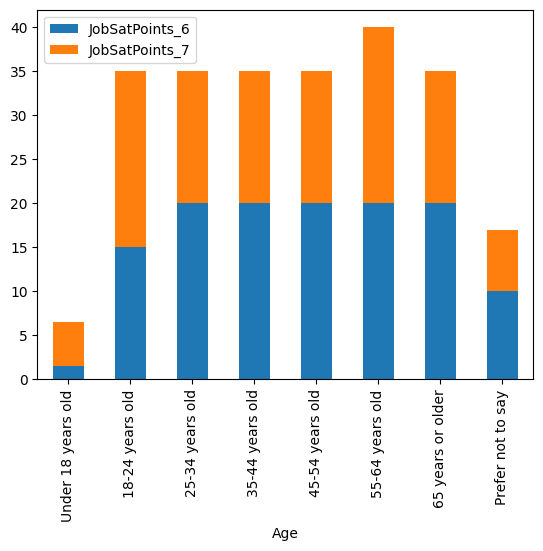

In [10]:
plt.figure(figsize=(12,7))
medians.plot.bar(stacked = True)
plt.show()

##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


In [11]:
##Write your code here
top10emp = df['Employment'].value_counts().head(10)
top10emp

Employment
Employed, full-time                                                         39041
Independent contractor, freelancer, or self-employed                         4846
Student, full-time                                                           4709
Employed, full-time;Independent contractor, freelancer, or self-employed     3557
Not employed, but looking for work                                           2341
Employed, part-time                                                          1266
Student, full-time;Employed, part-time                                       1115
Employed, full-time;Student, full-time                                        897
Employed, full-time;Student, part-time                                        839
Student, full-time;Not employed, but looking for work                         686
Name: count, dtype: int64

In [12]:
emp_df = df[df['Employment'].isin(top10emp.index)]
emp_df

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [13]:
emp_grouped_df = emp_df.groupby('Employment')[['JobSatPoints_6','JobSatPoints_7']].mean()
emp_grouped_df= emp_grouped_df.drop(index = ['Student, full-time', 'Student, full-time;Not employed, but looking for work'])
emp_grouped_df

,JobSatPoints_6,JobSatPoints_7
Employment,,
"Employed, full-time",24.377575,22.617560
"Employed, full-time;Independent contractor, freelancer, or self-employed",24.273578,23.513005
"Employed, full-time;Student, full-time",22.848700,26.393868
"Employed, full-time;Student, part-time",25.254864,26.284600
"Employed, part-time",24.807692,22.228938
"Independent contractor, freelancer, or self-employed",24.595635,22.286169
"Not employed, but looking for work",20.000000,20.000000
"Student, full-time;Employed, part-time",20.792363,25.529691


<Figure size 1200x700 with 0 Axes>

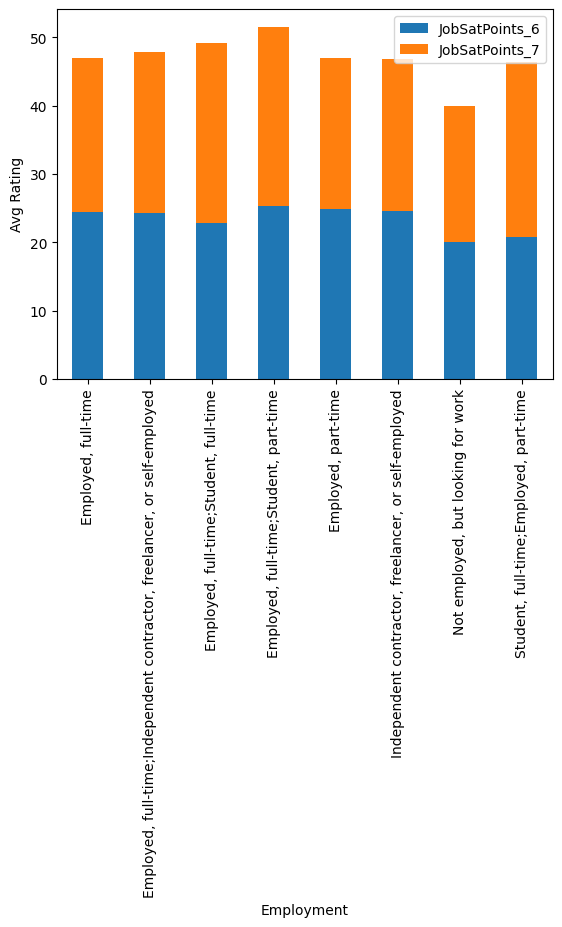

In [14]:
plt.figure(figsize=(12,7))
emp_grouped_df.plot.bar(stacked = True)
plt.ylabel('Avg Rating')
plt.show()

### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


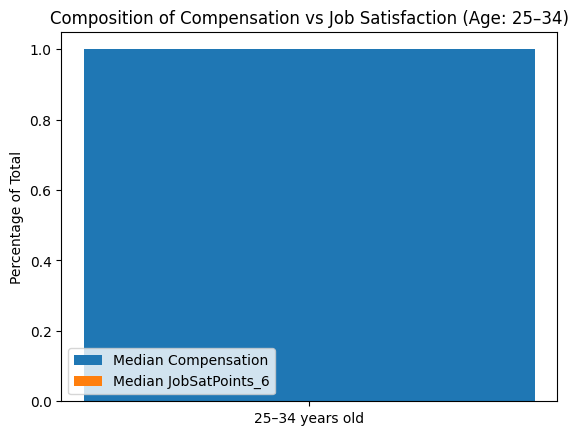

In [15]:
##Write your code here
df_age = df[df['Age'] == '25-34 years old'] 
med_comp = df_age['ConvertedCompYearly'].median() 
med_sat = df_age['JobSatPoints_6'].median() 
total = med_comp + med_sat 
comp_pct = med_comp / total 
sat_pct = med_sat / total
labels = ['25–34 years old']
values = [comp_pct, sat_pct]

plt.bar(labels, comp_pct, label='Median Compensation')
plt.bar(labels, sat_pct, bottom=comp_pct, label='Median JobSatPoints_6')

plt.title('Composition of Compensation vs Job Satisfaction (Age: 25–34)')
plt.ylabel('Percentage of Total')
plt.legend()
plt.show()

##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


In [16]:
##Write your code here

### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


/tmp/ipykernel_301/2990981072.py:25: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_per_age = counts.groupby('Age').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)


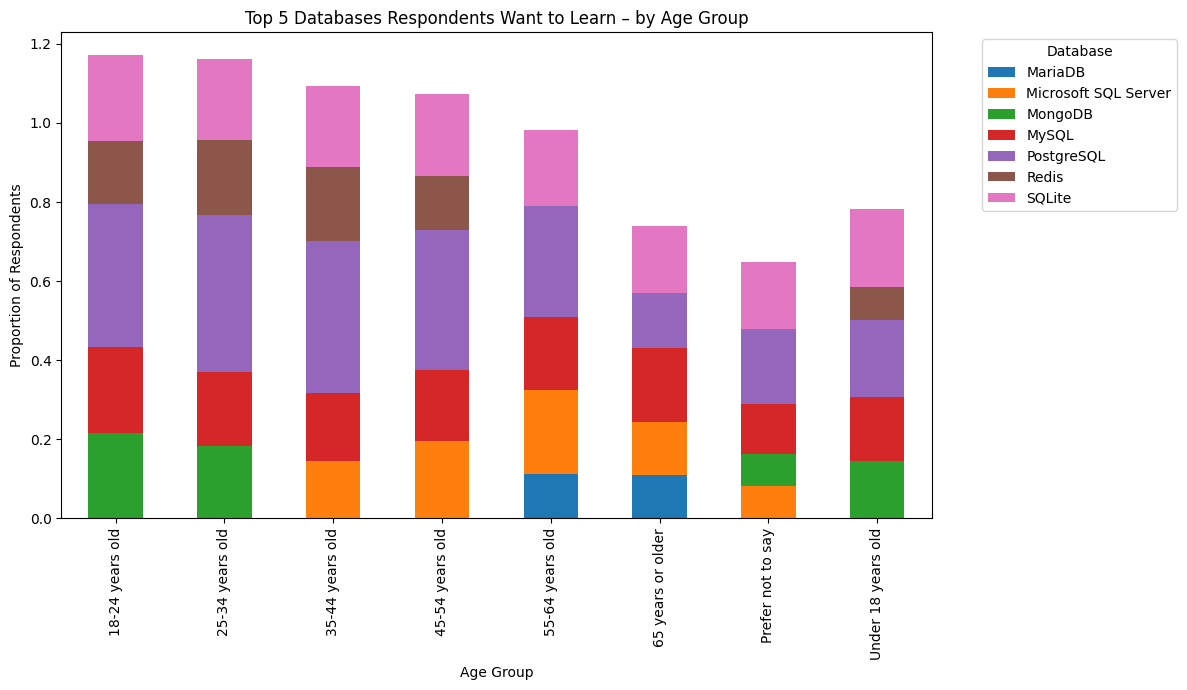

In [17]:
# ===========================
# Task: Top Databases by Age Group (Stacked Bar Chart)
# ===========================

# ---------------------------
# Step 1: Explode the DatabaseWantToWorkWith column
# ---------------------------
# This column contains multiple databases separated by semicolons.
# We split the strings into lists and then "explode" the dataframe so that
# each row contains one age + one database.
df_exploded = df.assign(
    DatabaseWantToWorkWith=df['DatabaseWantToWorkWith'].str.split(';')
).explode('DatabaseWantToWorkWith')

# ---------------------------
# Step 2: Count how many respondents selected each database per age group
# ---------------------------
# Group by Age and DatabaseWantToWorkWith, then count the occurrences
counts = df_exploded.groupby(['Age', 'DatabaseWantToWorkWith']).size().reset_index(name='count')

# ---------------------------
# Step 3: Find the top 5 databases per age group
# ---------------------------
# Use groupby + nlargest to keep only the top 5 databases for each age group
top5_per_age = counts.groupby('Age').apply(lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

# ---------------------------
# Step 4: Compute proportions for each database within the age group
# ---------------------------
# First, get total respondents per age group
age_totals = df['Age'].value_counts()

# Merge the totals into top5 dataframe to calculate proportions
top5_per_age = top5_per_age.merge(
    age_totals.rename('age_total'),
    left_on='Age',
    right_index=True
)

# Compute the proportion of respondents for each database
top5_per_age['proportion'] = top5_per_age['count'] / top5_per_age['age_total']

# ---------------------------
# Step 5: Pivot the dataframe for plotting
# ---------------------------
# Pivot so that each row = Age group, each column = Database,
# and values = proportion
pivot_df = top5_per_age.pivot(
    index='Age',
    columns='DatabaseWantToWorkWith',
    values='proportion'
).fillna(0)  # fill NaN with 0 for databases not in top 5 of that age group

# ---------------------------
# Step 6: Plot stacked bar chart
# ---------------------------
pivot_df.plot(kind='bar', stacked=True, figsize=(12,7))

plt.title('Top 5 Databases Respondents Want to Learn – by Age Group')
plt.ylabel('Proportion of Respondents')
plt.xlabel('Age Group')
plt.legend(title='Database', bbox_to_anchor=(1.05, 1), loc='upper left')  # place legend outside
plt.tight_layout()
plt.show()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


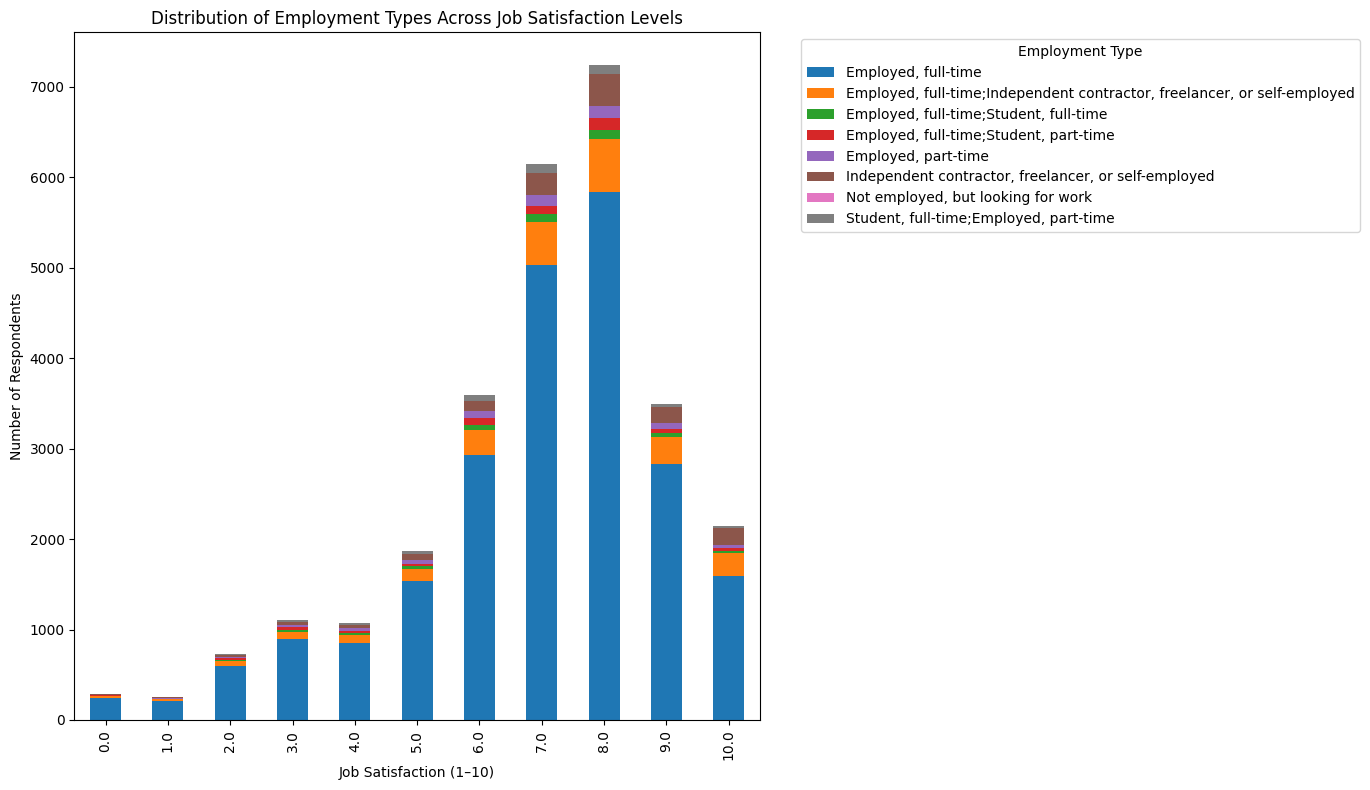

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1. Filter dataset to TOP 10 employment types
# -----------------------------
top10emp = df['Employment'].value_counts().head(10).index
emp_df = df[df['Employment'].isin(top10emp)]

# -----------------------------
# 2. GROUP BY JobSat + Employment
# -----------------------------
grouped = (
    emp_df
    .groupby(['JobSat', 'Employment'])
    .size()
    .reset_index(name='count')
)

# -----------------------------
# 3. Pivot table for stacked bar chart
# -----------------------------
pivot = grouped.pivot(
    index='JobSat',
    columns='Employment',
    values='count'
).fillna(0)

# Sort JobSat numerically if needed
pivot = pivot.sort_index()

# -----------------------------
# 4. Plot stacked bar chart
# -----------------------------
pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8)
)

plt.title('Distribution of Employment Types Across Job Satisfaction Levels')
plt.xlabel('Job Satisfaction (1–10)')
plt.ylabel('Number of Respondents')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


In [36]:
##Write your code here
top5lng = df['LanguageAdmired'].value_counts().head(5)
top5lng.head()

LanguageAdmired
Python                            1555
HTML/CSS;JavaScript;TypeScript    1058
C#                                 892
Python;SQL                         669
Java                               583
Name: count, dtype: int64

In [37]:
lng_df = df[df['LanguageAdmired'].isin(top5lng.index)]
lng_df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
7,8,I am learning to code,18-24 years old,"Student, full-time;Not employed, but looking f...",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Video-based Online Cou...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Difficult,NaN,NaN
9,10,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
13,14,"I used to be a developer by profession, but no...",35-44 years old,"Not employed, and not looking for work",NaN,Apples,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Colleague;Other online resources (e.g., videos...",Technical documentation;Blogs;Stack Overflow;I...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN,NaN
17,18,I am a developer by profession,18-24 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Blogs;Coding sessions (live or recorded);How-t...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN


In [40]:
lng_grouped = lng_df.groupby('Age')
lng_grouped = lng_grouped[lng_grouped['Age','LanguageAdmired' ]]

ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

<Figure size 1200x700 with 0 Axes>

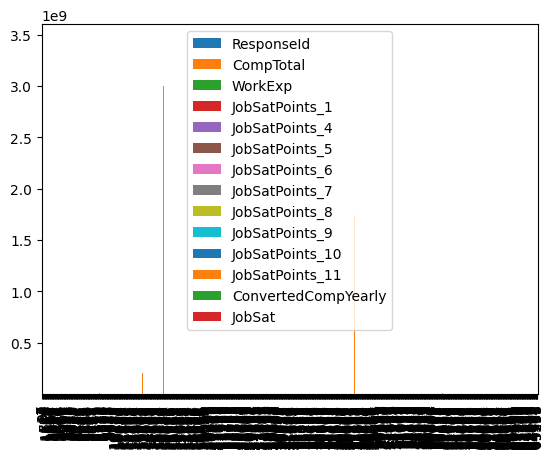

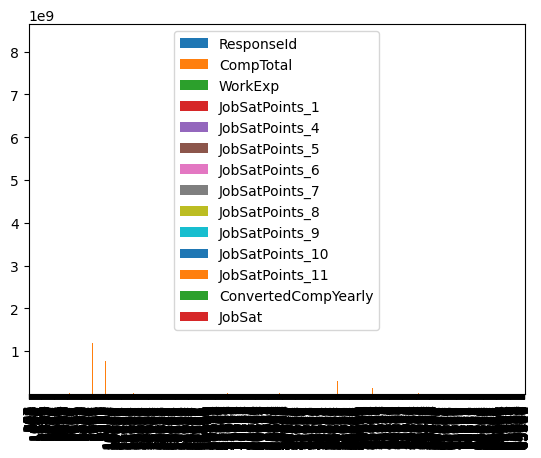

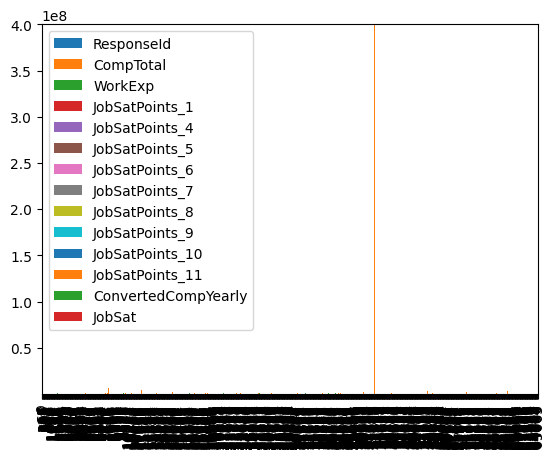

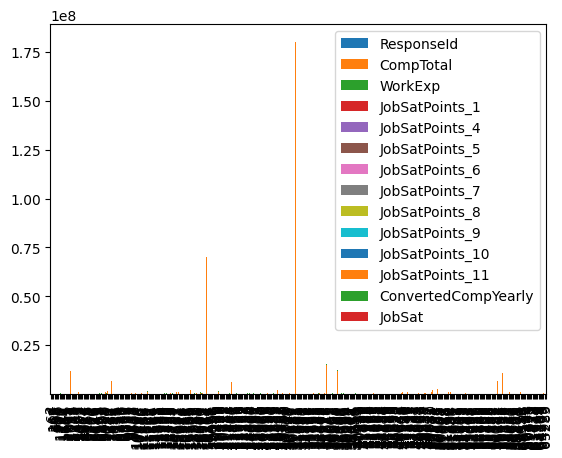

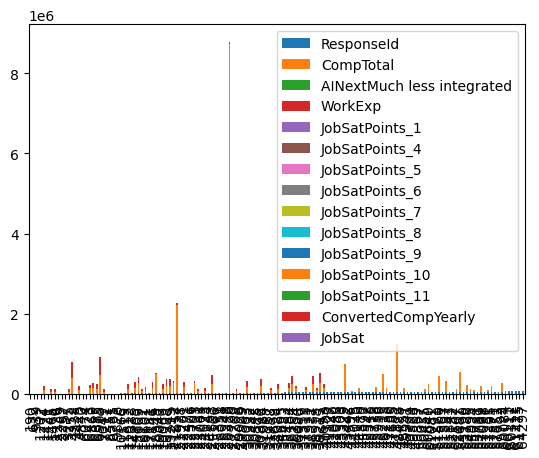

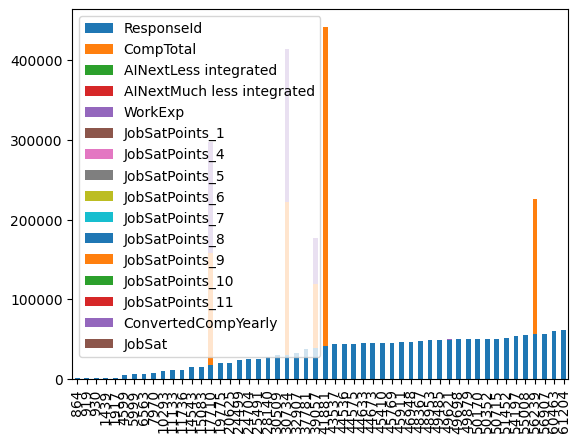

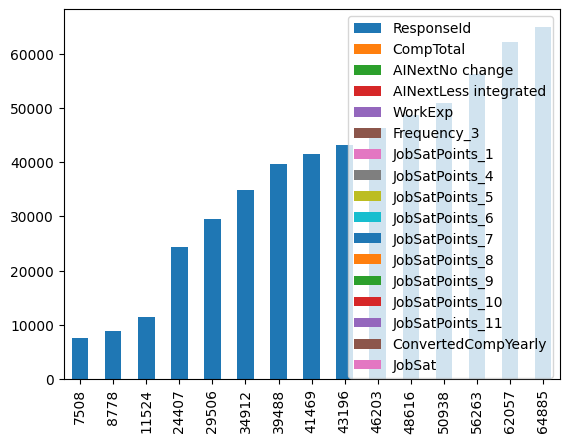

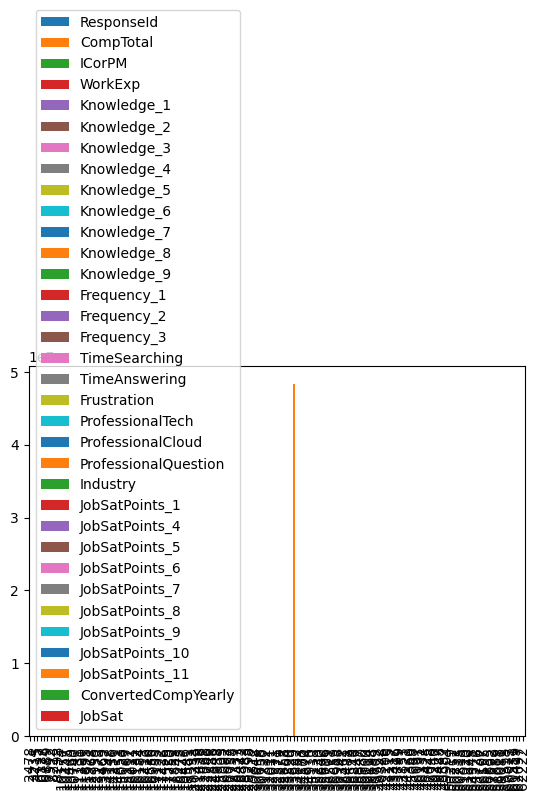

In [39]:

plt.figure(figsize = (12,7))
lng_grouped.plot.bar(stacked = True)
plt.show()

##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


In [ ]:
##Write your code here

### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
